In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation # To visualize in animation
from IPython import display # To display in html

In [2]:
import os
curent = os.getcwd()
print(curent)

C:\Users\admin\Lab_training\Week9_10


# Perceptron
<hr>
Activation function: $f(x) = sgn(x)$ <br>
Loss function: $J(\textbf{w}) = -\sum_{M}y_i.\textbf{x}_i^{T}.\textbf{w}$ <br>
Gradient descent: SGD: $\textbf{w} \leftarrow \textbf{w} - \textbf{x}_i.y_i$


In [3]:
def predict(X,w):
    return torch.sgn(X@w).squeeze()
def perceptron(X, y, w_init):
    w = [w_init]
    mis_points = []
    it = 0
    while True:
        y_hat = predict(X,w[-1])
        mis_idxs = torch.where(y!=y_hat)[0] # misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w, it, mis_points
        # randomly pick one misclassified point
        random_id = mis_idxs[torch.randint(num_mis,(1,1)).squeeze()].long()
        # update
        w_new = w[-1] + y[random_id]*X[random_id]
        mis_points.append(X[random_id])
        w.append(w_new)
        it+=1

In [24]:
means = [[-1,0],[1,0]]
cov = [[.3,.2], [.2, .3]]
N = 10
np.random.seed(2)
X0 = torch.Tensor(np.random.multivariate_normal(means[0], cov, N))
X1 = torch.Tensor(np.random.multivariate_normal(means[1], cov, N))

X = torch.cat((X0,X1), dim = 0)
y = torch.cat((torch.ones(N), -torch.ones(N)))

Xbar = torch.cat((torch.ones(2*N,1), X), dim = 1)
np.random.seed(73)
w_init = torch.randn(Xbar.shape[1])
w, it, mis_points = perceptron(Xbar, y, w_init)
print('Obtain w = {}, after {} iterations'.format(w[-1],it))

Obtain w = tensor([ 0.1064, -1.8708,  0.4986]), after 3 iterations


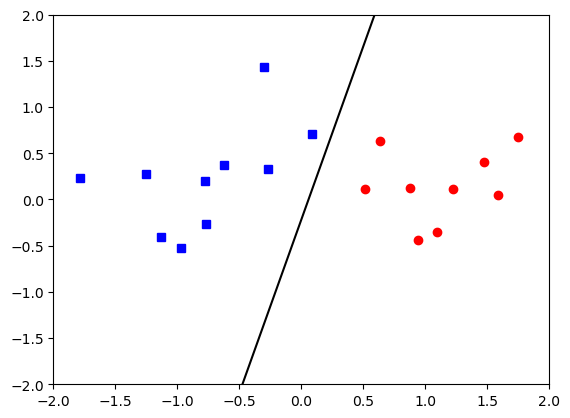

In [25]:
plt.plot(X0[:,0].flatten(),X0[:,1].flatten(),'bs')
plt.plot(X1[:,0].flatten(),X1[:,1].flatten(),'ro')
xx = torch.linspace(-2,2,100)
yy = -w[-1][0]/w[-1][2]+-w[-1][1]/w[-1][2]*xx
plt.axis([-2,2,-2,2])
plt.plot(xx,yy,'k-')
plt.savefig(curent+'\ForLatex\perceptron1.pdf')

In [26]:
# animation
def animate(i, w, mis_points, line):
    w = w[i]
    ax.clear()
    if i < len(mis_points):
        xmis, ymis = mis_points[i][1:]
        cir = plt.Circle((xmis, ymis), 0.1, color = 'k', fill = False)
        ax.add_patch(cir)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.plot(X0[:,0].flatten(),X0[:,1].flatten(),'bs')
    ax.plot(X1[:,0].flatten(),X1[:,1].flatten(),'ro')
    xx = torch.linspace(-2,2,100)
    yy = -w[0]/w[2]+-w[1]/w[2]*xx
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_title('iterations = %d' %i)
    line = ax.plot(xx,yy,'k-')
    return line,


fig = plt.figure()
ax = fig.add_subplot()
line = ax.plot()

animation = FuncAnimation(fig, animate, fargs = (w, mis_points, line), interval = 400, frames = len(w), blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

In [38]:
def illustration(nrows, ncols, w):
    fig = plt.figure(figsize = (7,8))
    for i in range(len(w)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        w_ = w[i]
        if i < len(mis_points):
            xmis, ymis = mis_points[i][1:]
            cir = plt.Circle((xmis, ymis), 0.15, color = 'k', fill = False)
            ax.add_patch(cir)
        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)
        ax.plot(X0[:,0].flatten(),X0[:,1].flatten(),'bs')
        ax.plot(X1[:,0].flatten(),X1[:,1].flatten(),'ro')
        xx = torch.linspace(-2,2,100)
        yy = -w_[0]/w_[2]+-w_[1]/w_[2]*xx
        ax.set_xlabel('x axis')
        ax.set_ylabel('y axis')
        ax.set_title('iterations = %d' %i)
        ax.plot(xx,yy,'k-')
    fig.subplots_adjust(hspace = 1/2)
    fig.savefig(curent + '\ForLatex\perceptron2.pdf')

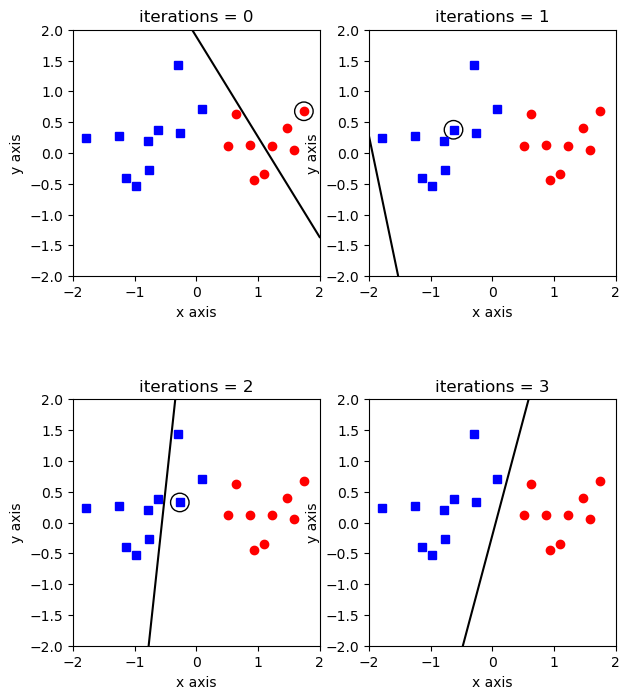

In [39]:
illustration(2,2,w)